In [481]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [482]:
df = pd.read_csv("diamond.csv")
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


# Data Analysis

In [483]:
df.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


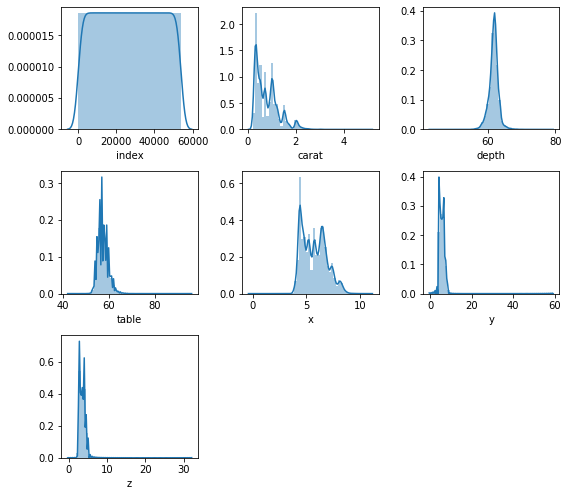

In [485]:
plt.figure(figsize=(8,7))
columns = ['index','carat','depth','table','x','y','z']
for i, column in enumerate(columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(df[column])
    
plt.tight_layout()

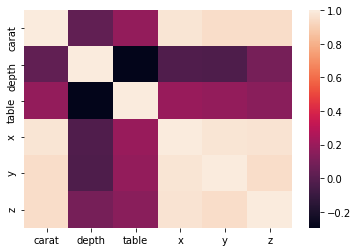

In [486]:
df = df.drop(['index'], axis = 1)
sns.heatmap(df.corr())

# Pre-Process

### Change Categorical Values

In [487]:
#Our cathegorical columns=>cut, color, clarity, price
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price       object
dtype: object

In [488]:
newDf = df.copy()

In [489]:
#I wanted use one-hot-encoding but I always got an error named "TypeError: Expected tuple, got str"
#and I could not find the reason even if I searched at the internet 

In [490]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [491]:
encd = {"color": {"D":1, "E":2,"F":3, "G":4,
                     "H":5, "I":6, "J":7}}

newDf = newDf.replace(encd)
newDf.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,2,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,Premium,2,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,Good,2,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,Premium,6,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,Good,7,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [492]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [493]:
encd = {"clarity": {"IF":1, "VVS1":2,"VVS2":3, "VS1":4,
                     "VS2":5, "SI1":6, "SI2":7, "I1":8}}

newDf = newDf.replace(encd)
newDf.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,2,7,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,Premium,2,6,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,Good,2,4,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,Premium,6,5,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,Good,7,7,63.3,58.0,4.34,4.35,2.75,Very Low


In [494]:
df['price'].unique()

array(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype=object)

In [495]:
encd = {"price": {"Very Low":1, "Low":2,"Medium":3, "High":4,
                     "Very High":5}}

newDf = newDf.replace(encd)
newDf.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,2,7,61.5,55.0,3.95,3.98,2.43,1
1,0.21,Premium,2,6,59.8,61.0,3.89,3.84,2.31,1
2,0.23,Good,2,4,56.9,65.0,4.05,4.07,2.31,1
3,0.29,Premium,6,5,62.4,58.0,4.20,4.23,2.63,1
4,0.31,Good,7,7,63.3,58.0,4.34,4.35,2.75,1


In [496]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [497]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [498]:
encd = {"cut": {"Ideal":1, "Fair":2,"Good":3, "Very Good":4,
                     "Premium":5}}

newDf = newDf.replace(encd)
newDf.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,1,2,7,61.5,55.0,3.95,3.98,2.43,1
1,0.21,5,2,6,59.8,61.0,3.89,3.84,2.31,1
2,0.23,3,2,4,56.9,65.0,4.05,4.07,2.31,1
3,0.29,5,6,5,62.4,58.0,4.20,4.23,2.63,1
4,0.31,3,7,7,63.3,58.0,4.34,4.35,2.75,1


### Outliers

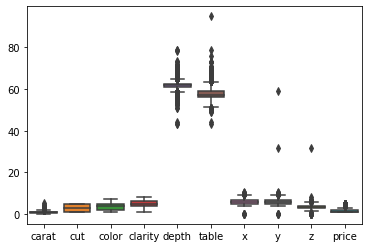

In [499]:
sns.boxplot(data=newDf)

In [500]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [501]:
outliers = list(set(np.where((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5*iqr)))[0]))
len(outliers)

4636

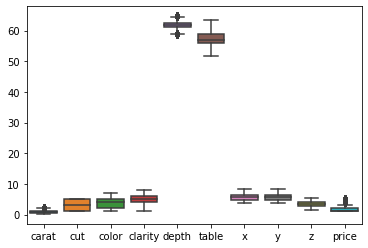

In [502]:
newDf = newDf.drop(outliers, axis = 0).reset_index(drop = True)
sns.boxplot(data=newDf)

# ML Application

In [503]:
X = newDf.drop(['price'], axis=1)
y = newDf[['price']]
y

,price
0,1
1,1
2,1
3,1
4,1
...,...
49299,1
49300,1
49301,1
49302,1


In [504]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(sampling_strategy='minority')
X_res, y_res = rus.fit_sample(X, y)
y_res.shape

#With this I increased my accuracy. If I don't use it, my accuracy is around 80%
#And also if I use RandomUnderSampling method I get 68% accuracy.

(81679, 1)

In [505]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)

## Decision Tree

In [506]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, criterion="gini",random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

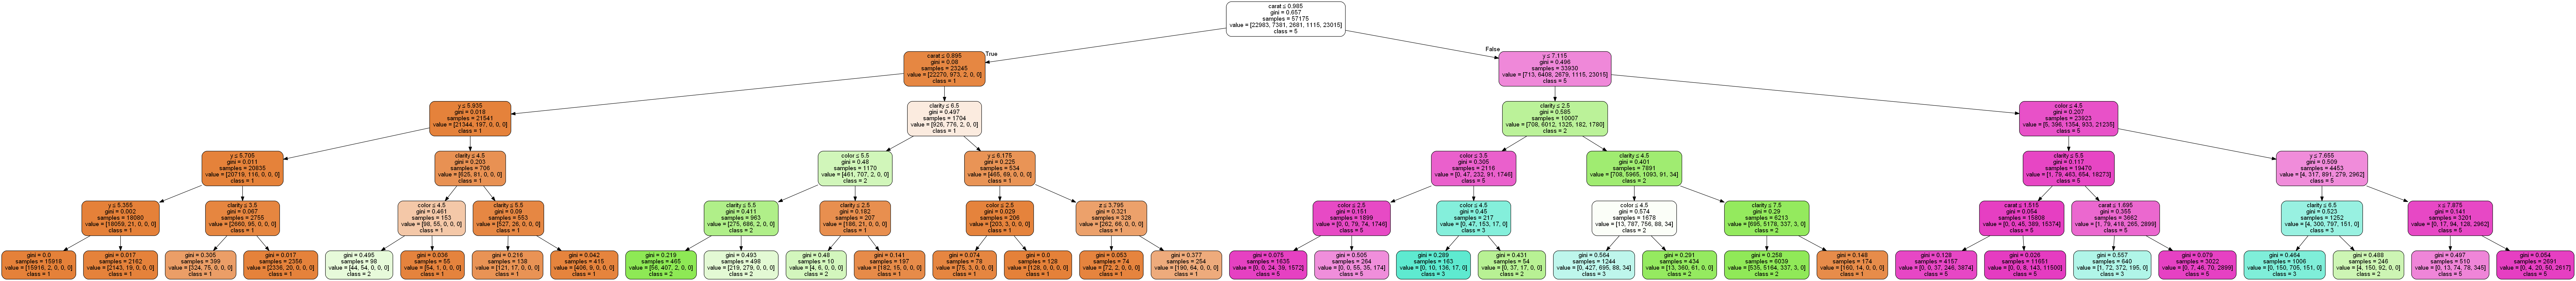

<Figure size 1440x1800 with 0 Axes>

In [507]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

plt.figure(figsize=(20,25))
dot_data=StringIO()
export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names=X.columns,
               class_names=['1', '2','3','4','5'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Output.png')
Image(graph.create_png())

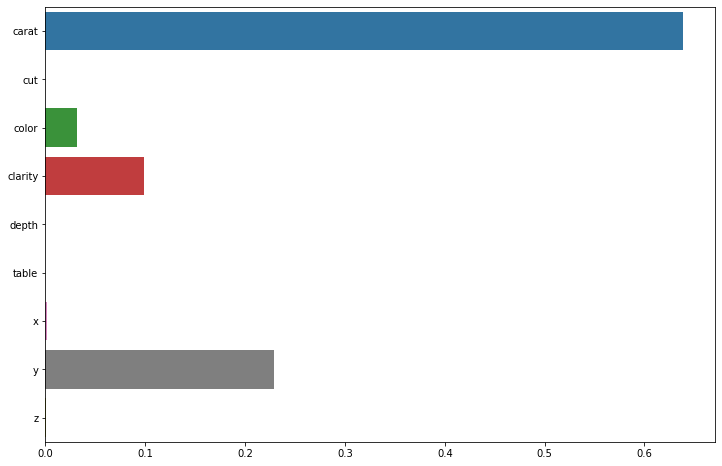

In [508]:
plt.figure(figsize=(12,8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)

C:\Users\Seyma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.99      0.96      0.98      9937
           2       0.83      0.88      0.85      3125
           3       0.63      0.72      0.67      1112
           4       0.00      0.00      0.00       425
           5       0.96      1.00      0.98      9905

    accuracy                           0.94     24504
   macro avg       0.68      0.71      0.70     24504
weighted avg       0.92      0.94      0.93     24504



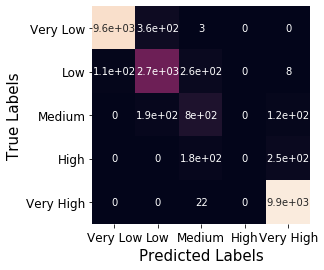

In [509]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
pred = clf.predict(X_test)
cm = confusion_matrix(y_test,pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'],fontsize = 12, rotation=0)
ax.yaxis.set_ticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'],fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
print(classification_report(y_test,pred))

## Naive-Bayes

In [510]:
from sklearn.naive_bayes import GaussianNB

In [511]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train.values.ravel())

C:\Users\Seyma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.99      0.93      0.96      9937
           2       0.64      0.87      0.74      3125
           3       0.22      0.16      0.19      1112
           4       0.00      0.00      0.00       425
           5       0.90      0.92      0.91      9905

    accuracy                           0.87     24504
   macro avg       0.55      0.58      0.56     24504
weighted avg       0.86      0.87      0.86     24504



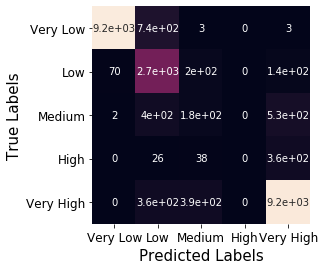

In [512]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'],fontsize = 12, rotation=0)
ax.yaxis.set_ticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'],fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
print(classification_report(y_test,pred))

## KNN

In [513]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [514]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           1       0.98      0.97      0.97      9937
           2       0.85      0.89      0.87      3125
           3       0.75      0.74      0.75      1112
           4       0.72      0.46      0.57       425
           5       0.99      1.00      0.99      9905

    accuracy                           0.95     24504
   macro avg       0.86      0.81      0.83     24504
weighted avg       0.95      0.95      0.95     24504



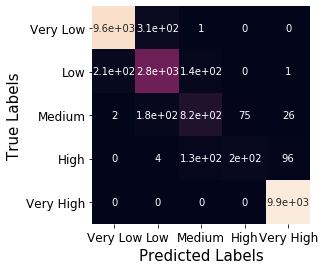

In [515]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'],fontsize = 12, rotation=0)
ax.yaxis.set_ticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'],fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
print(classification_report(y_test,pred))

 I choose KNN classification over other models. Because KNN have higher scores than other models. And also KNN can determine 'High' price but other models can't.
 
 I think generally I got bad results from the models. If I look the confusion matrix I can see that. I must give more balance to data or drop the some of columns.  